## Data Challenge 2

### Remarks / Insights

Based on my recently calculate Fiscal Paradise Index (FPI), the top 20 countries ranking worst as Fiscal Paradises are:

* Anguilla
* Marshall Islands
* British Virgin Islands
* Samoa
* U.S. Virgin Islands
* Saint Vincent and the Grenadines
* Liberia
* Niue
* Belize
* Bermuda
* Turks and Caicos Islands
* Guernsey
* Jersey
* Bahamas
* Gibraltar
* Cayman Islands
* Seychelles
* Cook Islands
* Isle of Man
* Saint Lucia



In [103]:
import warnings
warnings.filterwarnings('ignore')

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpld3
import numpy as np
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go

import qgrid 
qgrid.nbinstall(overwrite=True)

from IPython.display import display, display_pretty, Javascript, HTML
# from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

# %qtconsole


# !python -m pip install ipython-sql
%load_ext sql
%config SqlMagic.autopandas=True
%matplotlib inline

sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 6  # plotsize 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [5]:
# Connect to SQL databse
%sql postgresql://JFBG@localhost/panama

u'Connected: JFBG@panama'

### Look at total number of involved parties

1 rows affected.
1 rows affected.
1 rows affected.


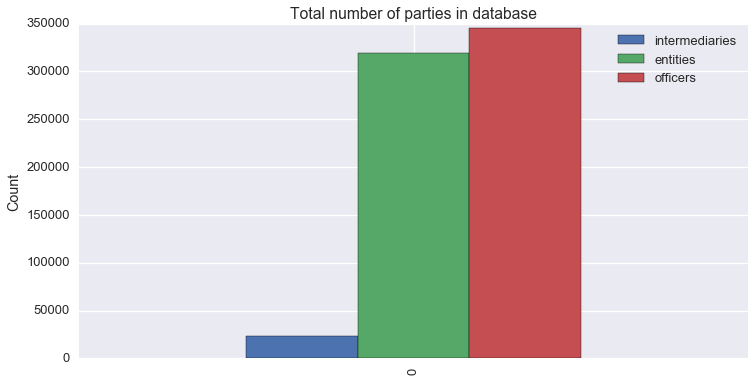

In [24]:
df_count = pd.DataFrame()
val = %sql select count(*) from intermediaries;
df_count['intermediaries'] = val
val = %sql select count(*) from entities;
df_count['entities'] = val
val = %sql select count(*) from officers;
df_count['officers'] = val
plt.figure()
df_count.plot.bar()
plt.title('Total number of parties in database')
plt.ylabel('Count')

### Look at distribution per country (top 100)

In [64]:
maxnum = 10
df_countries_E = %sql select countries, count(countries) count_c from entities group by countries order by count_c desc limit :maxnum;
# df_countries_E = %sql select country_codes, count(country_codes) count_c from entities group by country_codes order by count_c desc;

display_charts(df_countries_E, kind='pie', jjj=['countries'], y=['count_c'], title='Number of Entities per Country',tooltip={'pointFormat': '{series.name}: <b>{point.percentage:.1f}%</b>'})

10 rows affected.


### Nmber of connections for each intermediaries

In [ ]:
#SQL query
df_inter = %sql select n1d, country_codes, num_edge from intermediaries, (select node_1 n1d, count(node_1) num_edge from all_edges group by node_1) ss where n1d = node_id;

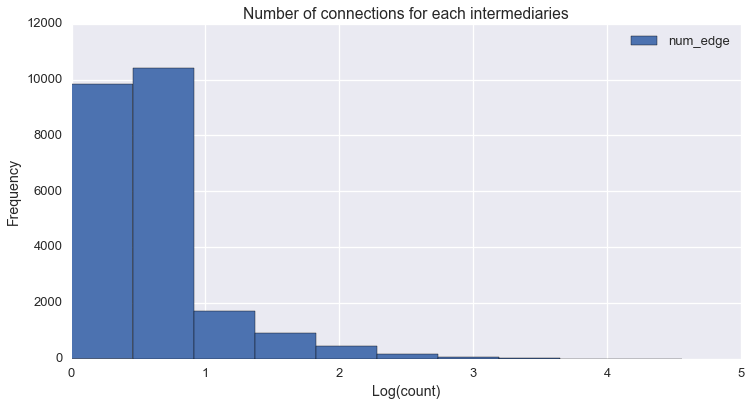

In [82]:
df_inter2 = pd.DataFrame(data = np.log10(df_inter['num_edge']))
plt.figure()
df_inter2.plot.hist()
plt.title('Number of connections for each intermediaries')
plt.xlabel('Log(count)')

In [74]:
qgrid.show_grid(df_inter2)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


```SQL
select name, country_codes, count(name) cn 
from officers 
where name 
not like '%LIMITED%' 
and name not like '%B__RER%'
and name not like '%??%'
and name not like '%EBARER%'
and name not like '%BEARE%'
and name not like '%B__rer%'
and name not like '%PORTADOR%'
and name not like '%ompany%'
and name not like '%imited%'
and name not like '%bearer%'
and name not like '%INC%'
and name not like '%Inc%'
and name not like '%LTD%'
and name not like '%Ltd%'
and name not like '%FOUNDATION%'
and name not like '%Foundation%'
and name not like '%HOLDING%'
and name not like '%CORP%'
and name not like '%Corp%'
and name not like '%SERVICES%'
and name not like '%S\.A\.%'
and name not like '%Invest%'
and name not like '%INVEST%'
and name not like '%INTERN%'
and name not like '%Intern%'
and name not like '%Management%'
and name not like '%TRUST%'
and name not like '%Trust%'
and name not like '%Establis%'
and name not like '% AG'
and name not like '% SA'
and name not like '% Oy'
and name not like '% OY'
and name not like '%LLC%'
and name is not NULL
group by name, country_codes 
order by cn desc;
```

In [91]:
df_ind = %sql select name, country_codes, count(name) cn from officers where name  not like '%LIMITED%'  and name not like '%B__RER%' and name not like '%??%' and name not like '%EBARER%' and name not like '%BEARE%' and name not like '%B__rer%' and name not like '%PORTADOR%' and name not like '%ompany%' and name not like '%imited%' and name not like '%bearer%' and name not like '%INC%' and name not like '%Inc%' and name not like '%LTD%' and name not like '%Ltd%' and name not like '%FOUNDATION%' and name not like '%Foundation%' and name not like '%HOLDING%' and name not like '%CORP%' and name not like '%Corp%' and name not like '%SERVICES%' and name not like '%S\.A\.%' and name not like '%Invest%' and name not like '%INVEST%' and name not like '%INTERN%' and name not like '%Intern%' and name not like '%Management%' and name not like '%TRUST%' and name not like '%Trust%' and name not like '%Establis%' and name not like '% AG' and name not like '% SA' and name not like '% Oy' and name not like '% OY' and name not like '%LLC%' and name is not NULL group by name, country_codes order by name desc;

169083 rows affected.


In [100]:
# df_ind.head()
df_ind.country_codes.groupby

<bound method Series.groupby of 0          SVN
1         None
2         None
3          URY
4          COL
5         None
6         None
7         None
8          XXX
9          XXX
10         CHN
11         XXX
12         XXX
13         XXX
14         XXX
15         XXX
16         CHN
17         TWN
18         XXX
19         XXX
20         XXX
21         TWN
22         TWN
23         XXX
24         XXX
25         USA
26         XXX
27         XXX
28         TWN
29         XXX
          ... 
169053     XXX
169054     ROU
169055     XXX
169056     CHN
169057     CHN
169058     CHN
169059     MYS
169060     SGP
169061     XXX
169062     RUS
169063     NLD
169064     XXX
169065     CHN
169066     RUS
169067     XXX
169068     CHN
169069     XXX
169070     PHL
169071     TWN
169072     HKG
169073     XXX
169074     SGP
169075     TWN
169076     SGP
169077     CYP
169078     CHN
169079     IDN
169080     XXX
169081     IDN
169082     XXX
Name: country_codes, dtype: object>

```SQL
select B.cc, count1, count2 from 
(select cc, count(cc) count1 from 
(select name, countries cc, count(name) cn 
from officers 
where name 
not like '%LIMITED%' 
and name not like '%B__RER%'
and name not like '%??%'
and name not like '%EBARER%'
and name not like '%BEARE%'
and name not like '%B__rer%'
and name not like '%PORTADOR%'
and name not like '%ompany%'
and name not like '%imited%'
and name not like '%bearer%'
and name not like '%INC%'
and name not like '%Inc%'
and name not like '%LTD%'
and name not like '%Ltd%'
and name not like '%FOUNDATION%'
and name not like '%Foundation%'
and name not like '%HOLDING%'
and name not like '%CORP%'
and name not like '%Corp%'
and name not like '%SERVICES%'
and name not like '%S\.A\.%'
and name not like '%Invest%'
and name not like '%INVEST%'
and name not like '%INTERN%'
and name not like '%Intern%'
and name not like '%Management%'
and name not like '%TRUST%'
and name not like '%Trust%'
and name not like '%Establis%'
and name not like '% AG'
and name not like '% SA'
and name not like '% Oy'
and name not like '% OY'
and name not like '%LLC%'
and name is not NULL
and countries not like '%;%'
group by name, cc) A
group by cc) B,
(select cc, count(cc) count2 from 
(select name, countries cc, count(name) cn 
from officers 
group by name, cc) C
group by cc) D
where D.cc = B.cc
```

In [113]:
df_ratio = %sql select B.cc, count1 person, count2 total from (select cc, count(cc) count1 from (select name, countries cc, count(name) cn from officers where name not like '%LIMITED%' and name not like '%B__RER%' and name not like '%??%' and name not like '%EBARER%' and name not like '%BEARE%' and name not like '%B__rer%' and name not like '%PORTADOR%' and name not like '%ompany%' and name not like '%imited%' and name not like '%bearer%' and name not like '%INC%' and name not like '%Inc%' and name not like '%LTD%' and name not like '%Ltd%' and name not like '%FOUNDATION%' and name not like '%Foundation%' and name not like '%HOLDING%' and name not like '%CORP%' and name not like '%Corp%' and name not like '%SERVICES%' and name not like '%S\.A\.%' and name not like '%Invest%' and name not like '%INVEST%' and name not like '%INTERN%' and name not like '%Intern%' and name not like '%Management%' and name not like '%TRUST%' and name not like '%Trust%' and name not like '%Establis%' and name not like '% AG' and name not like '% SA' and name not like '% Oy' and name not like '% OY' and name not like '%LLC%' and name is not NULL and countries not like '%;%' group by name, cc) A group by cc) B, (select cc, count(cc) count2 from (select name, countries cc, count(name) cn from officers group by name, cc) C group by cc) D where D.cc = B.cc

206 rows affected.


In [115]:
df_ratio['entity'] = df_ratio.total - df_ratio.person
df_ratio['ratio'] = df_ratio.person/df_ratio.entity


In [121]:

l = []
trace0= go.Scatter(
    x= df_ratio.total,
    y= df_ratio.person,
    mode= 'markers',
#     marker= dict(size= 14,
#                 line= dict(width=1),
#                 color= c[i],
#                 opacity= 0.3
#                ),name= y[i],
    text= df_ratio.cc) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Real Persons versus Entities',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Real Person Officers',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Total Number of Officers',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

In [136]:
dfr2 = df_ratio.sort('ratio')
df_ratio.replace(np.inf,np.nan)
dfr2['indexsort'] = np.arange(1,len(dfr2)+1)

In [158]:
trace0= go.Scatter(
    x= dfr2.indexsort,
    y= dfr2.ratio,
    mode= 'markers',
#     marker= dict(size= 14,
#                 line= dict(width=1),
#                 color= c[i],
#                 opacity= 0.3
#                ),name= y[i],
    text= dfr2.cc) # The hover text goes here... 

trace2 = go.Scatter(
    x = [0,206],
    y = [1,1],
    mode = 'lines',
    name = 'lines'
)

l = [trace0, trace2]

layout= go.Layout(
    title= 'Fiscal Paradise Index',
    hovermode= 'closest',
    yaxis= dict(
        title= 'FPI',
        ticklen= 5,
#         zeroline= False,
        gridwidth= 2,
    ),
    xaxis=dict(
        title= 'Country',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

## Get list of country with FP index < less than 1 (worst)

In [157]:
dfr3 = dfr2.cc.where(dfr2.ratio < 1).dropna()
for i in dfr3.values:
    print(i)

Anguilla
Marshall Islands
British Virgin Islands
Samoa
U.S. Virgin Islands
Saint Vincent and the Grenadines
Liberia
Niue
Belize
Bermuda
Turks and Caicos Islands
Guernsey
Jersey
Bahamas
Gibraltar
Cayman Islands
Seychelles
Cook Islands
Isle of Man
Saint Lucia
Saint Kitts and Nevis
Nauru
Panama
Gambia
Liechtenstein
Barbados
Mauritius
Brunei
